# Multicollinearity

Multicollinearity is the phenomenonin which we one or more variable are highly correlated with each other. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

## Import Data Boston¶


In [2]:
from sklearn.datasets import load_boston


In [4]:
lb = load_boston()

In [5]:
boston = pd.DataFrame(data=lb.data,columns = lb.feature_names)

In [6]:
boston['target'] = lb.target

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preparation¶

In [8]:
X  = boston.drop('target',axis=1)
y = boston['target']

In [9]:
# removing the constant and quasi =constant featutres
for i in X.columns :
    if X[i].var() < 5:
        X.drop(i,axis=1,inplace=True)

In [10]:
X.head()

,CRIM,ZN,INDUS,AGE,RAD,TAX,B,LSTAT
0,0.00632,18.0,2.31,65.2,1.0,296.0,396.90,4.98
1,0.02731,0.0,7.07,78.9,2.0,242.0,396.90,9.14
2,0.02729,0.0,7.07,61.1,2.0,242.0,392.83,4.03
3,0.03237,0.0,2.18,45.8,3.0,222.0,394.63,2.94
4,0.06905,0.0,2.18,54.2,3.0,222.0,396.90,5.33


In [11]:
# correleation matrix
X.corr()

,CRIM,ZN,INDUS,AGE,RAD,TAX,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,0.352734,0.625505,0.582764,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.569537,-0.311948,-0.314563,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.644779,0.595129,0.720760,-0.356977,0.603800
AGE,0.352734,-0.569537,0.644779,1.000000,0.456022,0.506456,-0.273534,0.602339
RAD,0.625505,-0.311948,0.595129,0.456022,1.000000,0.910228,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,0.506456,0.910228,1.000000,-0.441808,0.543993
B,-0.385064,0.175520,-0.356977,-0.273534,-0.444413,-0.441808,1.000000,-0.366087
LSTAT,0.455621,-0.412995,0.603800,0.602339,0.488676,0.543993,-0.366087,1.000000


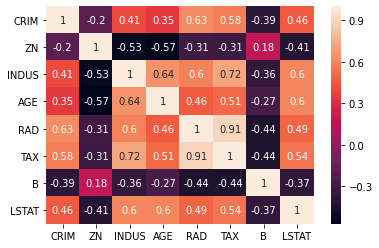

In [13]:
sns.heatmap(X.corr(),annot=True)

In [14]:
# removing the correlated features
corrfeat = []
for i in range(len(X.columns)):
    for j in range(i):
        if(abs(X.corr().iloc[i,j])>0.8):
               corrfeat.append(X.columns[i])

In [15]:
corrfeat

['TAX']

In [16]:
X.drop(corrfeat,axis=1,inplace = True )

In [17]:
X.head()

,CRIM,ZN,INDUS,AGE,RAD,B,LSTAT
0,0.00632,18.0,2.31,65.2,1.0,396.90,4.98
1,0.02731,0.0,7.07,78.9,2.0,396.90,9.14
2,0.02729,0.0,7.07,61.1,2.0,392.83,4.03
3,0.03237,0.0,2.18,45.8,3.0,394.63,2.94
4,0.06905,0.0,2.18,54.2,3.0,396.90,5.33


## Building model without correlated feature¶

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lr.coef_

array([-0.10708694,  0.03673728, -0.06258007,  0.05404976,  0.04501215,
        0.00952439, -0.95449536])

In [22]:
y_pred = lr.predict(X_test)

In [23]:
lr.intercept_

27.965989933709054

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
mean_squared_error(y_test,y_pred)

35.73878338228105

In [26]:
r2_score(y_test,y_pred)

0.5277551824042184

## Building model with correlated feature¶

In [28]:
# let's take the correlated feature TAX as well to find if that has affected our final predictions
corr_train = X_train 
corr_test = X_test

In [29]:
corr_train['TAX'] = boston.iloc[corr_train.index,9]
corr_test['TAX'] =  boston.iloc[corr_test.index,9]

D:\learning\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\learning\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
corr_lr = LinearRegression()


In [33]:
corr_lr.fit(corr_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
corr_lr.coef_


array([-0.10733283,  0.05081262,  0.05002877,  0.05574552,  0.27057169,
        0.00912558, -0.94280755, -0.0156826 ])

In [35]:
corr_pred = corr_lr.predict(corr_test)


In [36]:
mean_squared_error(y_test,corr_pred)

33.0350008989733

In [37]:
r2_score(y_test,corr_pred)


0.5634823993044273

## Comparison of both models¶


In [38]:
print('Mean squared error for model without correlated feature : ',mean_squared_error(y_test,y_pred))
print('Mean squared error for model with correlated feature : ',mean_squared_error(y_test,corr_pred))

Mean squared error for model without correlated feature :  35.73878338228105
Mean squared error for model with correlated feature :  33.0350008989733


In [39]:
print('r2_score for model without correlated feature :', r2_score(y_test,y_pred))
print('r2_score for model with a correlated feature :',r2_score(y_test,corr_pred))

r2_score for model without correlated feature : 0.5277551824042184
r2_score for model with a correlated feature : 0.5634823993044273


In [40]:
model1_coeff = list(lr.coef_)
model1_coeff.append('-')

In [41]:
pd.DataFrame({ 'model without correlated feature' : model1_coeff,
               'model with correlated feature' : list(corr_lr.coef_),
              
    
}).set_index(corr_train.columns)

,model without correlated feature,model with correlated feature
CRIM,-0.107087,-0.107333
ZN,0.0367373,0.050813
INDUS,-0.0625801,0.050029
AGE,0.0540498,0.055746
RAD,0.0450121,0.270572
B,0.00952439,0.009126
LSTAT,-0.954495,-0.942808
TAX,-,-0.015683


Result :
We can find that there is a big change in coefficients of the variable RAD when taking the TAX feature into the Linear model calculation

